### Corto No.2 
- Paola De León 20361
- Gabriela Contreras 20213

**PREGUNTAS TEORICAS**

1. Defina los componentes de las Cadenas de Markov
    - Estados: estos hacen referencia a las posibles condiciones o situaciones en las que se puede encontrar el sistema
    - Probailidades de transición: estas son las probabilidades de pasar de un estado a otro en un solo paso de tiempo, se organiza en una matriz de transición por medio de las cuales se define el comportamiento dinámico del sistema 
    - Probailidades de estado inicial: esta es como la distribución de las condiciones iniciales


2. Defina por lo menos 3 propiedades de las Cadenas de Markov
    - Falta de memoria: Solo reconoce la situacion actual y no las anteriores a estas 
    - Distribución de estado estacionario: Tiempo que pasa cada cosa en un estado 
    - Ergodicidad: Esto nos indica si es posible alcanzar un estado desde otro estado

3. ¿Por qué se suele usar procesos de Poisson para simular colas?
    - Estos son utilizados para la simulación de colas pues estos modelan los eventos aleatorios que ocurren en el tiempo de manera independiente a una tasa constante, lo cual se adapta perfecto al concepto de una cola en la cual las llegadas y salidas son eventos aleatorios y estocásticos.  


4. Defina las dos etapas que se suelen emplear para Simulation Optimization
    - 1ra. Etapa: Implica encontrar las decisiones determinísticas optimas en base a lo que sabemos
    - 2da. Etapa: Implica tomar decisiones que se basan en  la aleatoriedad

**PREGUNTAS PARACTICA**

                        ST   ST_conf
Tasa de Interés:  1.052133  0.184014
Volatilidad       0.981721  0.173882
                        S1   S1_conf
Tasa de Interés:  0.263730  0.184372
Volatilidad       0.083161  0.176729


C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_14532\1476360697.py:35: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N)
c:\Users\Contreras GP\AppData\Local\Programs\Python\Python311\Lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


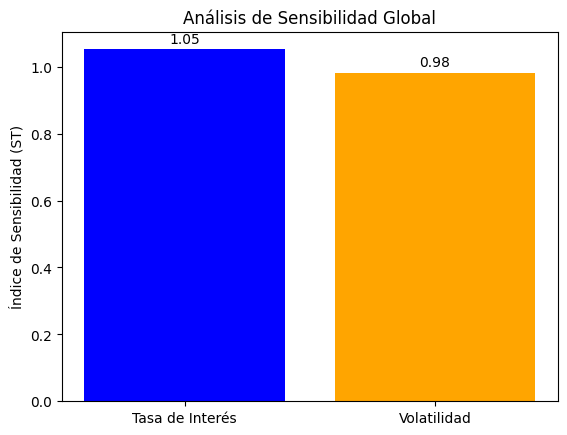

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.analyze import sobol
from SALib.sample import saltelli

# Parámetros del problema
N = 1000
Inversion = 5
media  = 500000
Tasa_descuento = 0.1
esviación_estándar  = 100000


# Distribución de datos
np.random.seed(123)
flujos = np.random.normal(
    loc = media, 
    scale = esviación_estándar,
    size=(N, Inversion))


# Descontar flujos de caja a valores actuales.
discounted_flujos = flujos / (1 + Tasa_descuento) ** np.arange(1, Inversion + 1)
present_value_net = np.sum(discounted_flujos, axis=1)


# Definir rangos de las variables de entrada
problem = {
    'num_vars': 2,
    'names': ['Tasa de Interés:', 'Volatilidad'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}

# Generar muestras
param_values = saltelli.sample(problem, N)


# Evaluar el modelo con las muestras generadas
Y = np.array(present_value_net)


# Realizar el análisis de sensibilidad
Si = sobol.analyze(problem, Y, calc_second_order=False, print_to_console=True)


# Gráficar 
param_names = ['Tasa de Interés', 'Volatilidad']
plt.bar(param_names, Si['ST'], color=['blue', 'orange'])
plt.ylabel('Índice de Sensibilidad (ST)')
plt.title('Análisis de Sensibilidad Global')

# Agregar etiquetas con valores numéricos en la parte superior de las barras
for i, val in enumerate(Si['ST']):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


 

1. ¿Qué tanto influye cada variable en el VPN?
    - Ambas variables tienen un impacto significativo en el Valor Presente Neto, pues en el la variable de tasa de interés se obtuvo un índice de sensibilidad de 1.05 y con la variable de volatibilidad un 0.98. Estos resultados indican que un cambio del 1% en la tasa de interés resulta en un cambio del 1.05% del VPN, mientras que un cambio del 1% en la volatibilidad impacta un 0.98% en el VPN.


2. ¿Qué variable influye más? ¿Por qué cree que es esto?
    - Ambas variables tienen un impacto significativo en el Valor Presente Neto, pues en el la variable de tasa de interés se obtuvo un índice de sensibilidad de 1.05 y con la variable de volatibilidad un 0.98. Estos resultados indican que un cambio del 1% en la tasa de interés resulta en un cambio del 1.05% del VPN, mientras que un cambio del 1% en la volatibilidad impacta un 0.98% en el VPN.

3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?
    - A pesar de que la tasa de interés cuenta con un influencia relativamente mayor en comparación con la volatidad no se cuenta con una diferencia significativa puesto a que ambas variables generan cambios significativos los cuales son importantes evaluar ante una decision financiera. 

4. Si tuviera que hacer mejoras al análisis ¿qué podría hacer?
    - Para poder contar con un análisis más completo se podrían agregar otros factores de costos e ingresos para así poder evaluar todos los posibles factores que podrían afectar una inversión. 
    - Se podría aumentar el numero de la muestra que se estan utilizando con la finalidad de poder ir evaluando los cambios de manera más detallada la fluctuación de las variables evaluadas. 